In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [19]:
class AgentState(TypedDict):
    number1: int
    operatation: str
    number2: int
    finalNumber: int

In [20]:
def adder(state: AgentState) -> AgentState:
    "This node adds the two numbers"
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    "This node subtracts the two numbers"
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation" # returning edge
    elif state["operation"] == "-":
        return "subtraction_operation" # returning edge


In [21]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) # passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router", # source node
    decide_next_node, # function to decide the next node
    # edges
    {
        # Edge Node
        "add_operation": "add_node",
        "subtract_operation": "subtract_node",
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

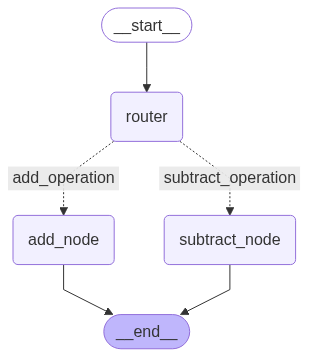

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
initial_state_1 = AgentState(number1=10, operation="-", number2=5)
print(app.invoke(initial_state_1))

KeyError: 'operation'